<a href="https://colab.research.google.com/github/qudgns147/amon/blob/master/bike_sharing_demand_Preprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle Bike Sharing Demand 

*   EDA --> Preprocess --> 회귀  --> Randomforest --> 10Percent 도전
*   항목 추가

Reference : 
 - https://www.kaggle.com/kwonyoung234/for-beginner
 - https://www.youtube.com/watch?v=woSEc5d_skE&feature

In [ ]:
#라이브러리 호출

import warnings 
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import calendar
from datetime import datetime

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Bike_sharing_demand/bike-sharing-demand/train.csv', parse_dates=['datetime'])
train.shape

(10886, 12)

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/Bike_sharing_demand/bike-sharing-demand/test.csv', parse_dates=['datetime'])
test.shape

(6493, 9)

In [ ]:
train["year"] = train.datetime.dt.year
train["month"] = train.datetime.dt.month
train["day"] = train.datetime.dt.day
train["hour"] = train.datetime.dt.hour
train["minute"] = train.datetime.dt.minute
train["dayofweek"] = train.datetime.dt.dayofweek

train.shape

(10886, 18)

In [ ]:
print(train.head())
train.info()

             datetime  season  holiday  ...  hour  minute  dayofweek
0 2011-01-01 00:00:00       1        0  ...     0       0          5
1 2011-01-01 01:00:00       1        0  ...     1       0          5
2 2011-01-01 02:00:00       1        0  ...     2       0          5
3 2011-01-01 03:00:00       1        0  ...     3       0          5
4 2011-01-01 04:00:00       1        0  ...     4       0          5

[5 rows x 18 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886

In [ ]:
print(train.registered.head())
print(train.casual.head())
print(train['count'].head())

0    13
1    32
2    27
3    10
4     1
Name: registered, dtype: int64
0    3
1    8
2    5
3    3
4    0
Name: casual, dtype: int64
0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64


# Data 설명
* datetime - hourly date + timestamp  
 - 2011-01-01 01:00:00 (연-월-일 1시 0분 0초)
* season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
 - 1 : 봄, 2 : 여름, 3 : 가을, 4 : 겨울
* holiday - whether the day is considered a holiday
 - 0 : 평일, 1 : 토/일, 공휴일
* workingday - whether the day is neither a weekend nor holiday
 - 0 : 휴일?, 1: 평일
* weather 
 - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 맑음, 약간 구름, 
 - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 흐림, 안개 
 - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 약한 눈/비, 천둥
 - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
    - 강한 눈, 우박, 천둥, 안개
* temp - temperature in Celsius
 - 온도
* atemp - "feels like" temperature in Celsius
 - 체감 온도
* humidity - relative humidity
 - 습도
* windspeed - wind speed
 - 바람 속도
* casual - number of non-registered user rentals initiated
 - 처음 사용하는 사람의 수
* registered - number of registered user rentals initiated
 - 원래 등록했던 사람의 사용수
* count - number of total rentals
 - 전체 대여 수 (casual + registered)
* dayofweek - The day of week
 - 0 : Mon, 1 : Tue, 2 : Wed, 3: Thu, 4 : Fri, 5 : Sat, 6 : Sun

[Text(0, 0.5, 'count'), Text(0.5, 1.0, 'count of hour')]

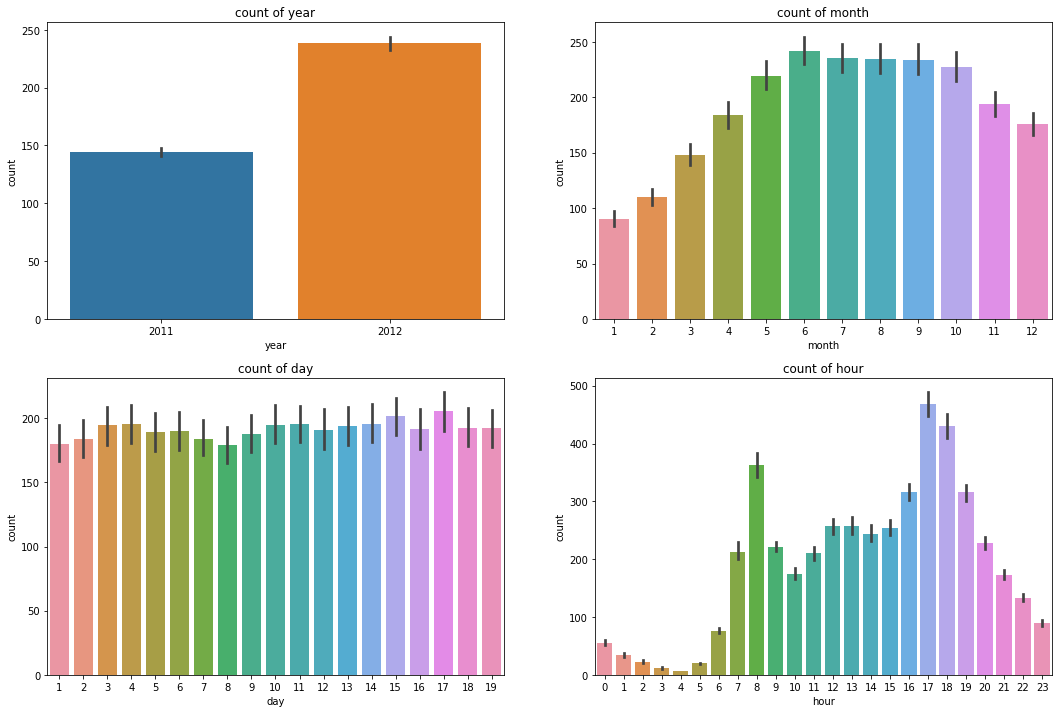

In [ ]:
#연도별, 월별, 일자별, 시간별 시각화
figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(18,12)

sns.barplot(data=train, x='year', y='count', ax=ax1)
sns.barplot(data=train, x='month', y='count', ax=ax2)
sns.barplot(data=train, x='day', y='count', ax=ax3)
sns.barplot(data=train, x='hour', y='count', ax=ax4)

ax1.set(ylabel='count', title='count of year')
ax2.set(ylabel='count', title='count of month')
ax3.set(ylabel='count', title='count of day')
ax4.set(ylabel='count', title='count of hour')

* 2011년에 비해 2012년에는 약 50%이상의 증가를 했으며, 이는 사용자 풀이 늘어난 것을 확인 할 수 있다.
* 월별로 확인 했을 때, 겨울, 봄에는 사용률이 낮으며, 여름, 가을의 경우 크게 늘어난 것을 확인할 수 있다. 
* 일자별로 봤을 경우, 각 일자가 크게 다르지 않으므로 (유의미한 차이 없음) 일자에 대한 의미는 없는 것으로 판단
  - day = 19일까지 밖에 없음
* 시간대 별로 봤을 경우,출퇴근 시간(8시, 5/6시 등)에 몰려서 사용하며, 취침시간에는 사용률이 가장 저조한 것을 확인할 수 있다.

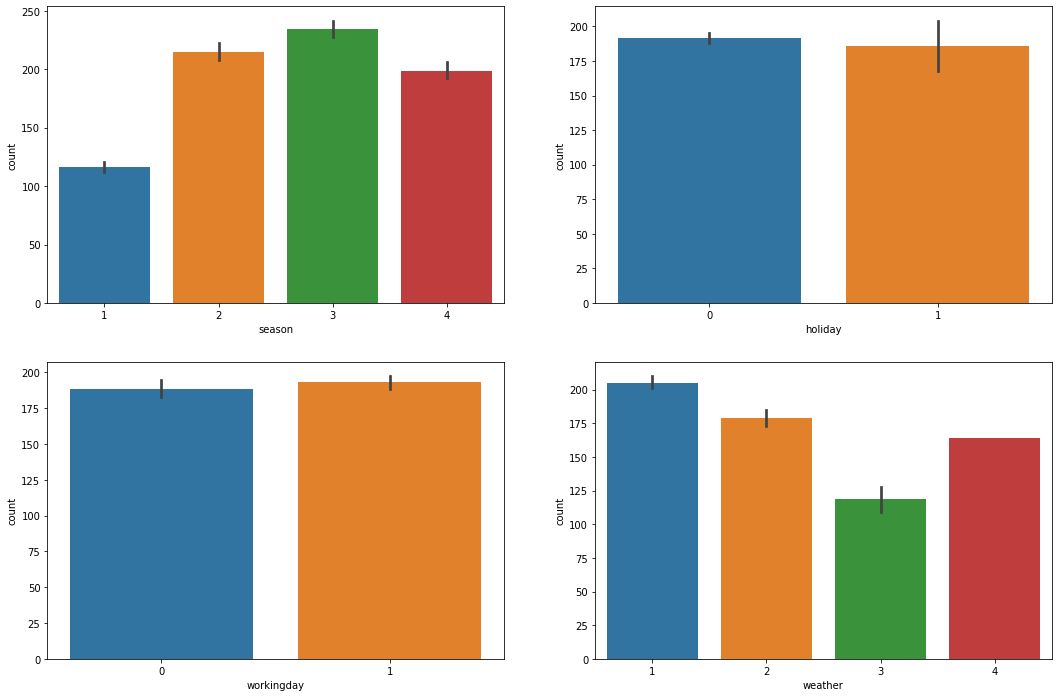

In [ ]:
#계절, 휴일여부, 평일, 날씨
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(18, 12)

sns.barplot(data=train, x='season', y='count', ax=ax1)
sns.barplot(data=train, x='holiday', y='count', ax=ax2)
sns.barplot(data=train, x='workingday', y='count', ax=ax3)
sns.barplot(data=train, x='weather', y='count',ax=ax4)

* 계절 
  * 1 : 1,2,3월 = Spring? 
  * 계절에 대한 탐색 필요
  * 봄에 오히려 사용 수가 가장 적은것에 대한 문제, 수정 필요

* 평일엔 오히려 높고 주말엔 더 쉬어야 하지 않는가? (집돌이의 예상)

* 날씨가 가장 안좋을 때 더 많이 탄다? 편차 바가 없는 것으로 보아 표본수가 매우 적을 것으로 예상 확인필요


# 계절 재정의
* 봄 : 3,4,5 
* 여름 : 6, 7, 8
* 가을 : 9, 10, 11
* 겨울 : 12, 1, 2

ref. https://ko.weatherspark.com/y/23912/%EB%AF%B8%EA%B5%AD-%EB%89%B4%EC%9A%95-%EC%A3%BC-%EB%89%B4%EC%9A%95%EC%9D%98-%EB%85%84%EC%A4%91-%ED%8F%89%EA%B7%A0-%EB%82%A0%EC%94%A8

In [ ]:
def to_right_season(month):
  if month in [3, 4, 5]:
    return 1
  elif month in [6,7,8] :
    return 2
  elif month in [9,10, 11]:
    return 3
  else : return 4

train['season'] = train.month.apply(to_right_season)

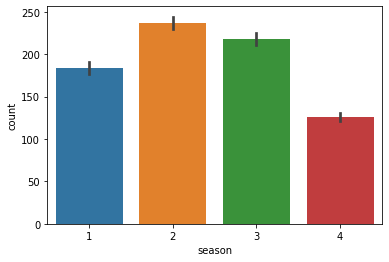

In [ ]:
fig = plt.subplot()
sns.barplot(data=train, x='season', y='count', ax=fig)


* 예상과 같이 봄, 겨울에 사용률이 저조함

# Holiday 확인
* 일하는 날인지가 더 중요하지 않을까 

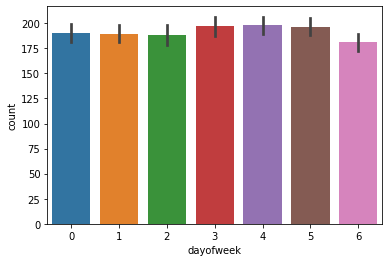

In [ ]:
sns.barplot(data=train, x='dayofweek', y='count')

* 5, 6 =  주말, 생각보다 사용률이 매우 높음. 
* 평일만큼 주말에도 많이 탄다는 결론
* 일요일에 가장 적음 (유의미해 보이지는 않음)

# 수치형 데이터들에 대한 시각화 및 EDA
- 온도
- 체감온도
- 습도
- 풍속 

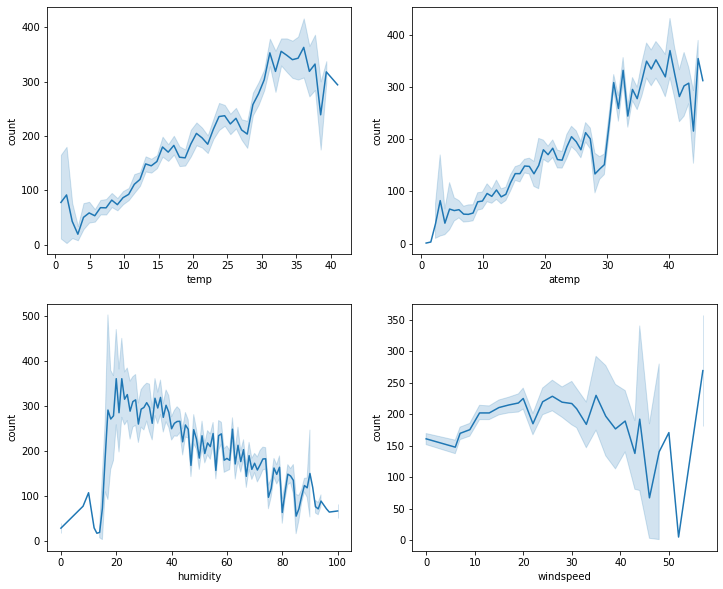

In [ ]:
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(12,10)

sns.lineplot(data=train, x='temp', y='count', ax=ax1)
sns.lineplot(data=train, x='atemp', y='count', ax=ax2)
sns.lineplot(data=train, x='humidity', y='count', ax=ax3)
sns.lineplot(data=train, x='windspeed', y='count', ax=ax4)

* temp, atemp는 유사한 모양으로, 온도와 체감온도가 크게 다르지 않음을 예상할 수 있음
 - 그에 따라 사용률 또한 유사한 모양을 그리는 것을 확인할 수 있음
* 습도의 경우, 20미만의 수치에 대해 변동성(옅은 색)이 크게 없음을 보아, 극소수의 숫자로 나타나는 것으로 보임
* 풍속의 경우, 풍속이 낮을 때는 일관적인 변동폭을 보이지만, 퐁속이 높아질수록 사용률 변동이 매우 커짐 
 - 풍속에 대한 추가 설명 필요

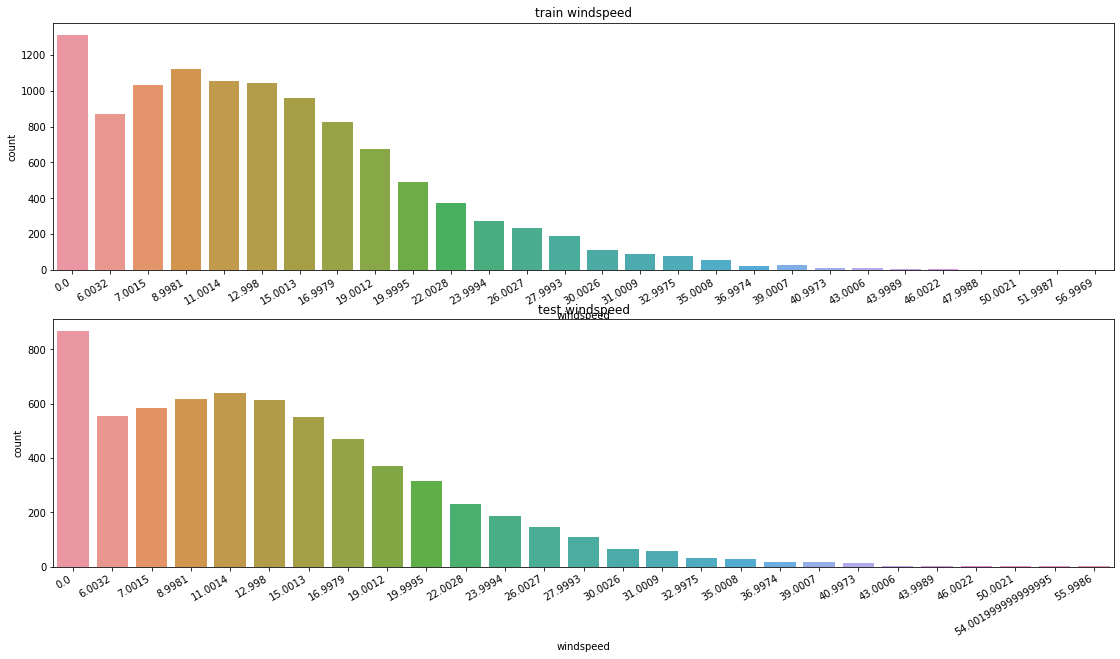

In [ ]:
fig, axes = plt.subplots(nrows=2)
fig.set_size_inches(19,10)

plt.sca(axes[0])
plt.xticks(rotation=30, ha='right')
axes[0].set(ylabel='count', title='train windspeed')
sns.countplot(data=train, x='windspeed', ax=axes[0])

plt.sca(axes[1])
plt.xticks(rotation=30, ha='right')
axes[1].set(ylabel='count', title='test windspeed')
sns.countplot(data=test, x='windspeed', ax=axes[1])